# This is problem 7.4 for CS514-assignment-2

In [71]:
import numpy as np
from scipy.linalg import block_diag

# construct A
a = np.ones((50,50))
A = block_diag(a,a,a)
A = A * 0.4 + 0.3
print(' Matrix A ')
print(A)

# generate B, for convenience of reproduction, fix random seed
np.random.seed(86)
B = np.random.random(A.shape)
print(' Matrix B ')
print(B)
# replace B's values 
ones = B >= A
B_replaced = ones * 1
print(' Matrix B_replaced ')
print(B_replaced)


 Matrix A 
[[0.7 0.7 0.7 ... 0.3 0.3 0.3]
 [0.7 0.7 0.7 ... 0.3 0.3 0.3]
 [0.7 0.7 0.7 ... 0.3 0.3 0.3]
 ...
 [0.3 0.3 0.3 ... 0.7 0.7 0.7]
 [0.3 0.3 0.3 ... 0.7 0.7 0.7]
 [0.3 0.3 0.3 ... 0.7 0.7 0.7]]
 Matrix B 
[[0.20260695 0.2070931  0.15263774 ... 0.78202423 0.22120209 0.22632819]
 [0.60996079 0.51438603 0.41949995 ... 0.96695275 0.85496038 0.88366691]
 [0.49326904 0.74515003 0.26340124 ... 0.14871525 0.50312319 0.34156898]
 ...
 [0.97878163 0.86981145 0.6195325  ... 0.43039011 0.51998359 0.22815529]
 [0.35156809 0.32950371 0.39210382 ... 0.02437912 0.207572   0.51161899]
 [0.01321017 0.70126371 0.33057441 ... 0.43990188 0.27814725 0.16811634]]
 Matrix B_replaced 
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 1]
 [0 1 0 ... 0 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


In [86]:
def KMeans_fit(X, epsilon=0, n_clusters=1, random_state=None):
    """
        A simple impelementation of KMeans methods,
        using random initialization and do not re-
        initialize centroids.
        Input:
          X -- input array
          epsilon -- a very small number used to identify convergence
          n_clusters -- number of clusters, integer
          random_state -- random seed, integer
        Output:
          inertia -- sum of square errors
          labels -- a array contains labels for data
    """
    # delta is the difference between previous centroids and new centroids
    delta = 1.0
    # distance matrix, with shape N x k, N is the num of samples, k is n_clusters
    distance = np.zeros((X.shape[0],n_clusters))
    # labels, an 1-D array with shape (N,), storing the cluster number data fell into.
    labels = np.zeros(X.shape[0])
    # initialize centroids
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.randint(150, size=n_clusters)
    centroids = X[indices]
    
    while(delta > epsilon):
        # compute distance matrix
        for i, centroid in enumerate(centroids):
            distance[:,i] = np.linalg.norm(X - centroid, axis=1)
        # assign each point to nearest cluster
        labels = np.argsort(distance,axis=1)[:,0]
        # update centroids by the means of each cluster
        new_centroids = np.zeros_like(centroids)
        for i in range(n_clusters):
            mean = np.mean(X[labels == i], axis=0)
            new_centroids[i] = mean
        # delta equals the sum of l2 distances between new and old centroids
        delta = np.sum(np.linalg.norm(new_centroids - centroids,axis=1))
        # update
        centroids = new_centroids
    
    # compute sum of square errors
    inertia = np.sum(distance.min(axis=1))
    
    return inertia, labels
    
    

In [89]:
np.set_printoptions(threshold=150)
# random permutation
np.random.seed(86)
permutation = np.random.permutation(A.shape[0])
# shuffle rows
A_shuffled = A[permutation]
# shuffle cols
A_shuffled = A_shuffled[:,permutation]
inertia, labels = KMeans_fit(A_shuffled, n_clusters=3, random_state=86)
# print clustering result to check if the clusters match natural clusters in A
# each cluster should correspond to a block in A,
# e.g. block1: row 0 to row 49, block2: row 50 to row 99
for k in range(3):
    # get indices of datapoints fell into cluster k in shuffled A 
    indices = labels == k
    # print original indices of those datapoints in A
    print('Cluster %d indices' %k)
    print(permutation[indices])

Cluster 0 indices
[61 55 59 84 72 53 69 91 87 74 51 81 50 98 85 89 94 90 80 77 54 86 83 79
 71 97 62 82 95 63 52 75 70 68 58 88 73 56 60 92 57 93 65 66 67 64 78 76
 99 96]
Cluster 1 indices
[32 30  1  8 39  9 19 34 35 40 37 25 20 21 47  0 11 45  3 15  7 33  6 36
 42 10 18 23 46 38 14 31  5 26 12 49 43  2 22 48 24 16  4 29 44 41 13 17
 27 28]
Cluster 2 indices
[113 130 132 128 138 136 129 143 146 117 118 100 133 102 112 139 125 123
 110 142 111 134 103 106 135 121 107 149 108 114 147 126 104 105 131 141
 144 140 115 145 101 127 109 116 124 120 119 122 137 148]


**The results of KMeans clustering using $k=3$ perfectly matches the natural clusters.**

/home/zy/anaconda2/envs/cs682/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zy/anaconda2/envs/cs682/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


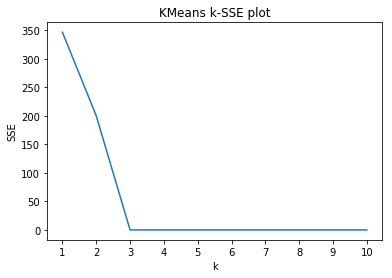

In [90]:
import matplotlib.pyplot as plt
errors = []
ks = np.arange(1,11)
for k in ks:
    sse, _ = KMeans_fit(A_shuffled, n_clusters=k, random_state=86)
    errors.append(sse)

plt.plot(ks, errors)
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('SSE')
plt.title('KMeans k-SSE plot')
plt.show()

**The plot shows that $k = 3$ is the correct choice since the knee point is located at $3$.**